C:\Users\PaganM\Miniconda3\envs\nfi_test\lib\site-packages\sklearn\neighbors\_kde.py:271: RuntimeWarning: divide by zero encountered in log
  log_density = self.tree_.kernel_density(


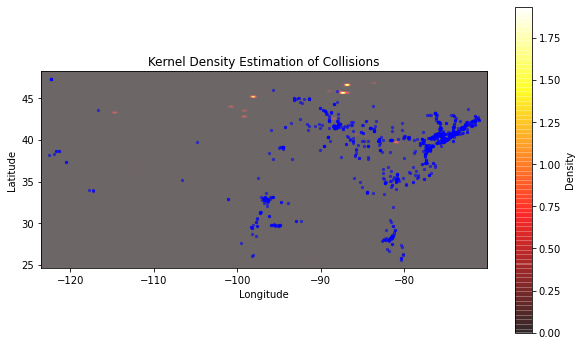

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Load your dataset
df = pd.read_csv('collision_counties.csv')

# Ensure there are no NaN values
# df['suspected_'] = df['suspected_'].dropna()  # Replace NaN values with zeros

# Prepare the data
data = {
    'latitude': df["latitude"],
    'longitude': df["longitude"],
    'collision_int': df['collision_int']
}

df = pd.DataFrame(data)

# Ensure there are no NaN values in longitude and latitude
df = df.dropna(subset=['longitude', 'latitude'])

coordinates = df[['longitude', 'latitude']].values
weights = df['collision_int'].values

# Remove rows with NaN values in weights
weights = weights[~np.isnan(weights)]
coordinates = coordinates[:len(weights)]

# Perform KDE with a smaller bandwidth for more localized density estimation
kde = KernelDensity(kernel='gaussian', bandwidth=0.02).fit(coordinates, sample_weight=weights)  # Adjust bandwidth here

# Create a grid of points within the range of data
x_min, x_max = coordinates[:, 0].min() - 1, coordinates[:, 0].max() + 1
y_min, y_max = coordinates[:, 1].min() - 1, coordinates[:, 1].max() + 1
x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
grid_coords = np.vstack([x.ravel(), y.ravel()]).T

# Evaluate the density model on the grid
log_density = kde.score_samples(grid_coords)
density = np.exp(log_density).reshape(x.shape)

# Create the heatmap data for folium
heat_data = np.vstack([y.ravel(), x.ravel(), density.ravel()]).T  # Note: folium uses [lat, lon, weight]

# Create a base map centered around the mean location
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=5)

# Add HeatMap layer to the map with adjusted radius and blur
heat_map_data = [[row[0], row[1], row[2]] for row in heat_data if row[2] > np.percentile(density, 50)]
HeatMap(heat_map_data, radius=12, blur=3, max_zoom=1).add_to(m)  # Adjusted radius and blur

# Save map to an HTML file
m.save("smaller_hotspots_collisions_heatmap.html")

# Optionally, visualize using matplotlib for a static image
plt.figure(figsize=(10, 6))
plt.imshow(density, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='hot', alpha=0.6)
plt.colorbar(label='Density')
plt.scatter(coordinates[:, 0], coordinates[:, 1], c='blue', s=5, alpha=0.5)
plt.title('Kernel Density Estimation of Collisions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


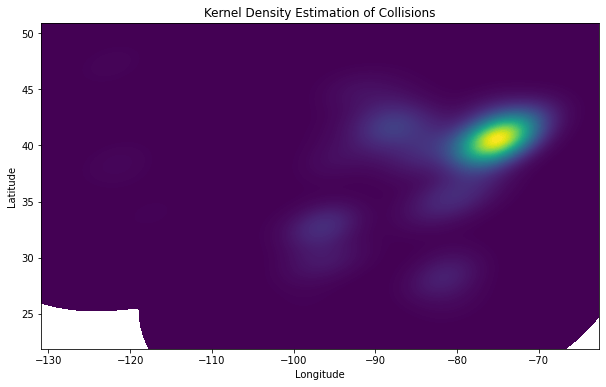

<Figure size 432x288 with 0 Axes>

In [2]:
import seaborn as sns

# Load your dataset
df = pd.read_csv('collision_counties.csv')

# Ensure there are no NaN values
#df['suspected_'] = df['collision_int'].fillna(0)  # Replace NaN values with zeros

# Create a KDE plot using Seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='longitude', y='latitude', fill=True, cmap='viridis', thresh=0, levels=100)
plt.title('Kernel Density Estimation of Collisions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
plt.savefig('kde_col_by_county_histogram.jpg', dpi=300)  # Specify the file name and DPI


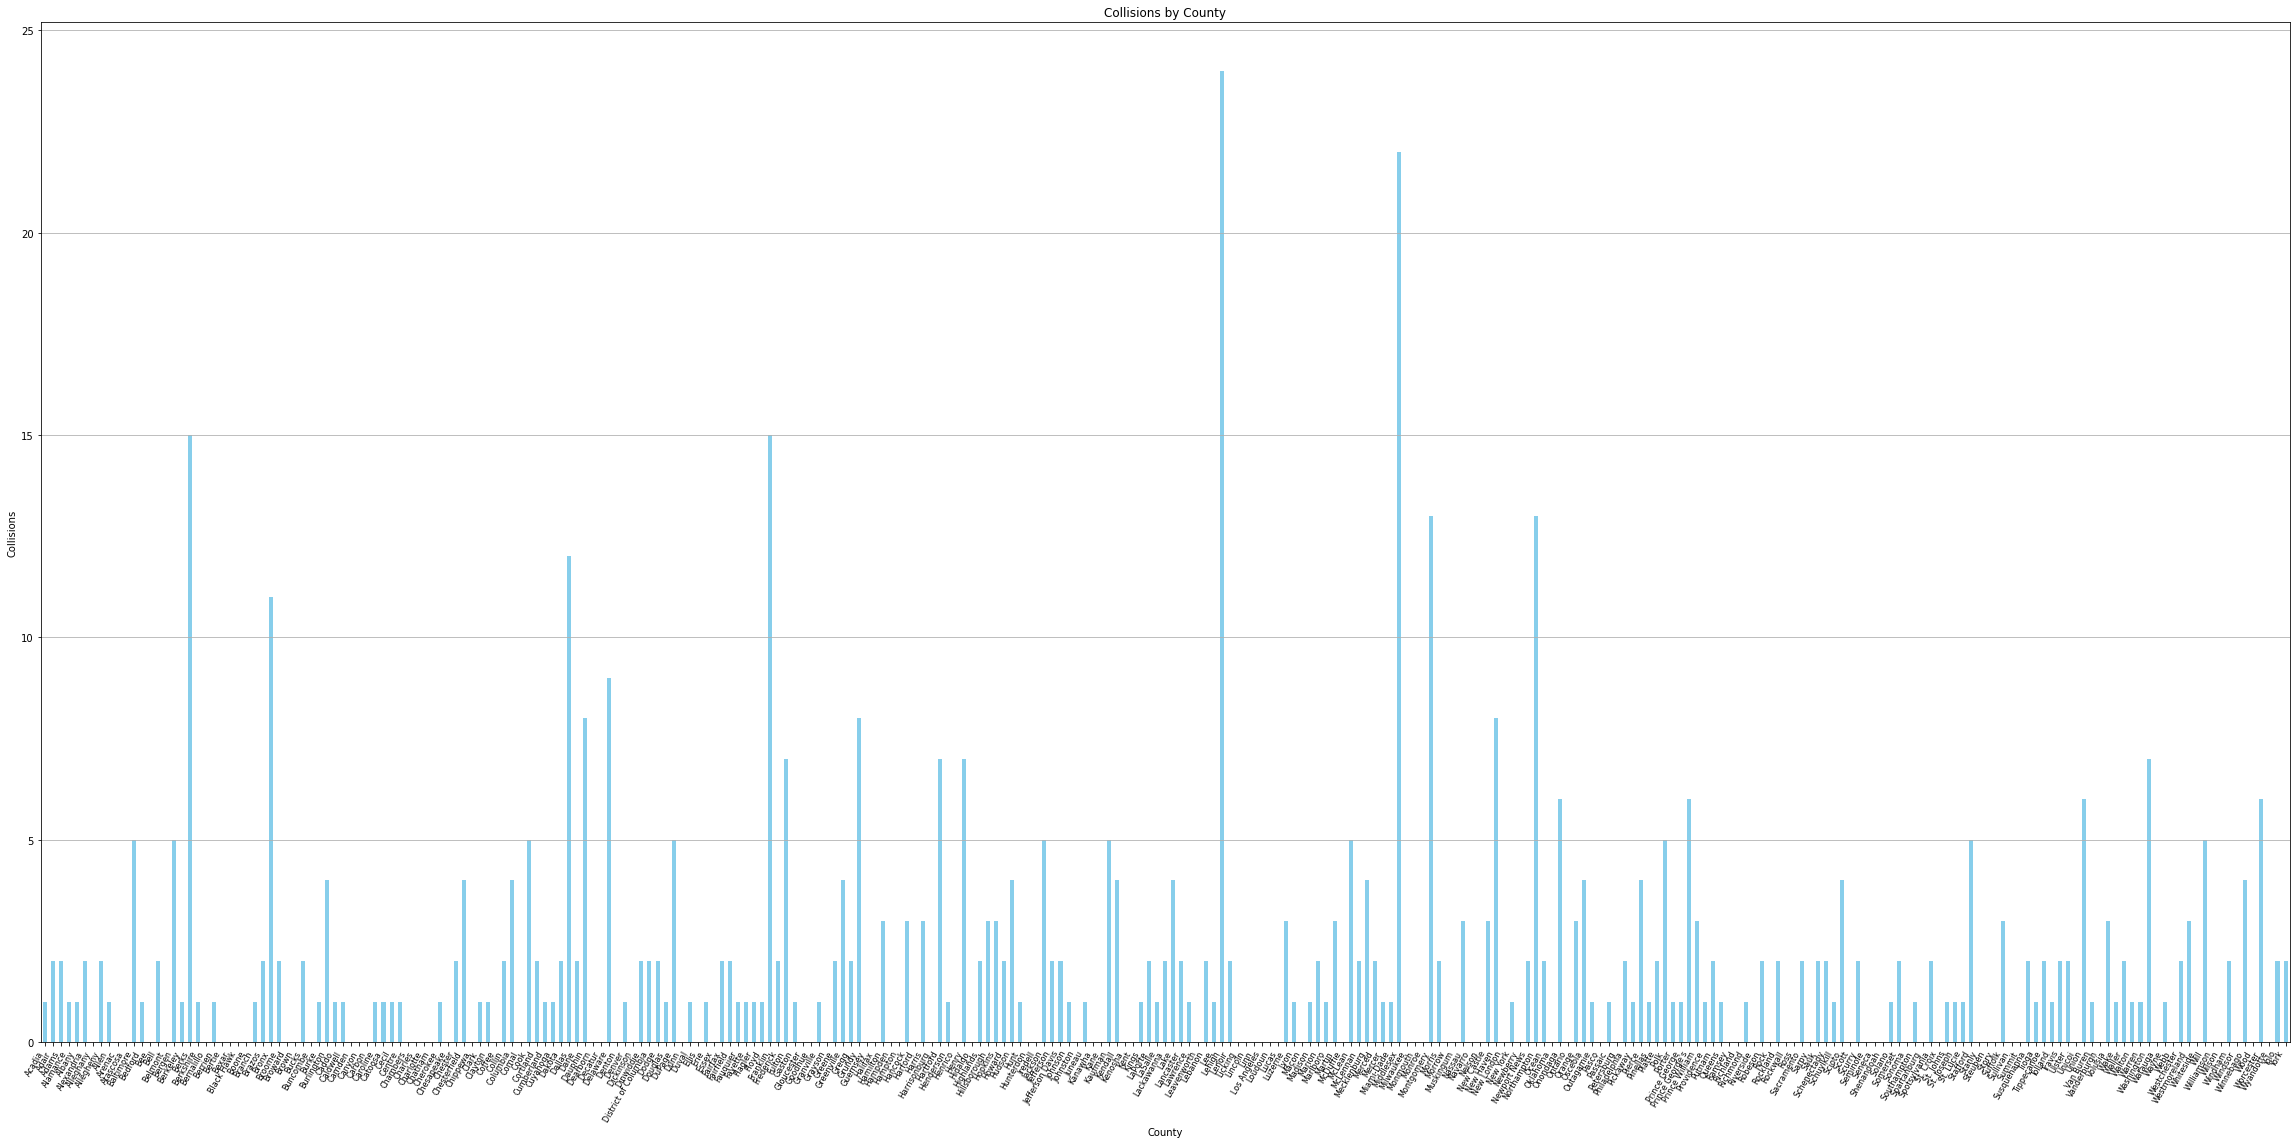

In [3]:
# Create histogram based on county names and suspected_collision counts with separated labels
# Aggregate suspected_collision counts by county name
df = pd.read_csv('collision_counties.csv')
collision_by_county = df.groupby('NAME')['collision_int'].sum()

plt.figure(figsize=(32, 16))  # Increase the figure size for better separation of labels
collision_by_county.plot(kind='bar', color='skyblue')
plt.title('Collisions by County')
plt.xlabel('County')
plt.ylabel('Collisions')
plt.xticks(rotation=60, ha='right', fontsize=8)  # Rotate and adjust font size for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('collisions_by_county_histogram.jpg', dpi=300)  # Specify the file name and DPI
plt.show()

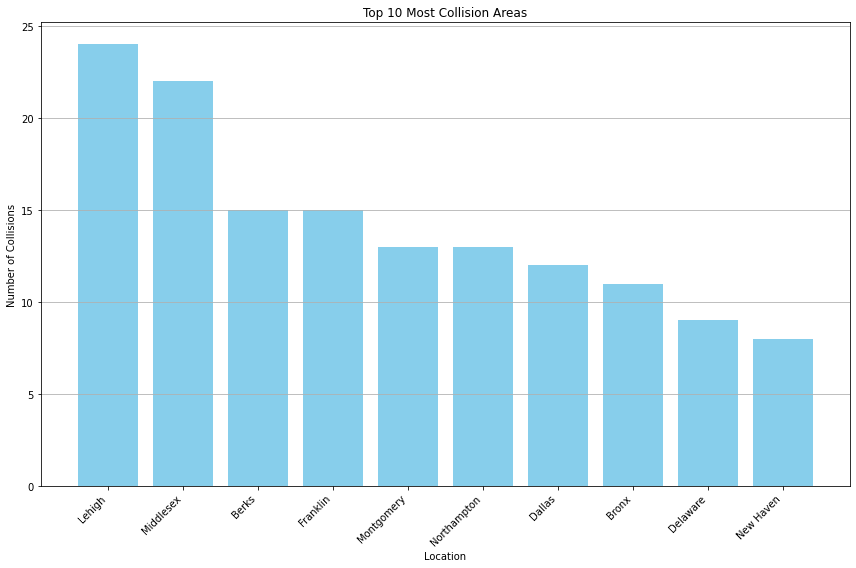

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('collision_counties.csv')

# Ensure there are no NaN values
#df['collision_int'] = df['collision_int'].fillna(0)  # Replace NaN values with zeros

# Group by 'NAME' and count the number of suspected collisions for each location
collision_counts = df.groupby('NAME')['collision_int'].sum().reset_index()

# Sort the counts in descending order
collision_counts = collision_counts.sort_values(by='collision_int', ascending=False)

# Select the top N locations (e.g., top 10)
top_n = 10
top_locations = collision_counts.head(top_n)

# Create a histogram
plt.figure(figsize=(12, 8))
plt.bar(top_locations['NAME'], top_locations['collision_int'], color='skyblue')
plt.title(f'Top {top_n} Most Collision Areas')
plt.xlabel('Location')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()

# Save the plot to a file
plt.savefig("top_collision_areas_histogram.png")

# Show the plot
plt.show()


In [5]:
import pandas as pd
import folium

# Load your dataset
df = pd.read_csv('C:\\Users\\PaganM\\Desktop\\python\\accident_locations\\collision_counties.csv')

# Ensure there are no NaN values in the necessary columns
df = df.dropna(subset=['longitude', 'latitude', 'collision_int'])

# Filter rows where collision_int is 1
df_filtered = df[df['collision_int'] == 1]

# Print the shape and first few rows of the filtered DataFrame
print("Filtered DataFrame shape:", df_filtered.shape)
print("First few rows of the filtered DataFrame:\n", df_filtered.head())

# Create a base map centered around the mean location
m = folium.Map(location=[df_filtered['latitude'].mean(), df_filtered['longitude'].mean()], zoom_start=5)

# Add markers for each point in the filtered DataFrame
for index, row in df_filtered.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']]).add_to(m)

# Save the map to an HTML file
m.save("collision_int_1_marker_map.html")

# Print a message indicating the map has been saved
print("Map has been saved as collision_int_1_marker_map.html")


Filtered DataFrame shape: (529, 33)
First few rows of the filtered DataFrame:
     field_1  group_level_4 vehicle_description driver_id  driver_home_group  \
2     51018            838              223049     WELBA              838.0   
8    111738            439              143101     GABEX              439.0   
11    87937            805              202351    805JUA              805.0   
12    18123            844              203024   WHIDA03              479.0   
13    91240            871              221230   DAVJE04              871.0   

     latitude  longitude  collision  collision_int  year  ...  CLASSFP  MTFCC  \
2   41.802212 -72.560550       True              1  2023  ...       H4  G4020   
8   30.167039 -81.567058       True              1  2023  ...       H6  G4020   
11  41.742806 -86.328542       True              1  2023  ...       H1  G4020   
12  40.494115 -86.862425       True              1  2024  ...       H1  G4020   
13  39.578141 -82.952942       True      

Filtered DataFrame shape: (529, 33)
First few rows of the filtered DataFrame:
     field_1  group_level_4 vehicle_description driver_id  driver_home_group  \
2     51018            838              223049     WELBA              838.0   
8    111738            439              143101     GABEX              439.0   
11    87937            805              202351    805JUA              805.0   
12    18123            844              203024   WHIDA03              479.0   
13    91240            871              221230   DAVJE04              871.0   

     latitude  longitude  collision  collision_int  year  ...  CLASSFP  MTFCC  \
2   41.802212 -72.560550       True              1  2023  ...       H4  G4020   
8   30.167039 -81.567058       True              1  2023  ...       H6  G4020   
11  41.742806 -86.328542       True              1  2023  ...       H1  G4020   
12  40.494115 -86.862425       True              1  2024  ...       H1  G4020   
13  39.578141 -82.952942       True      

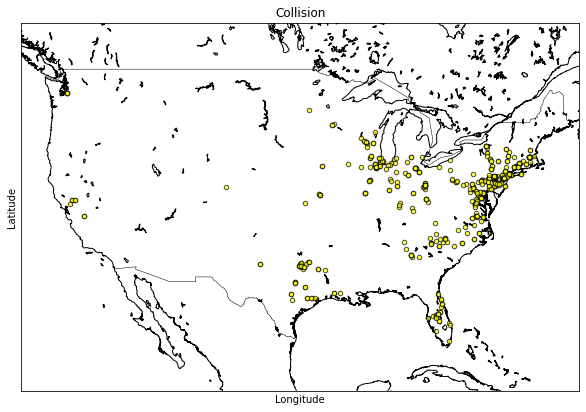

Map has been saved as collision_map.png


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Load your dataset
df = pd.read_csv('C:\\Users\\PaganM\\Desktop\\python\\accident_locations\\collision_counties.csv')

# Ensure there are no NaN values in the necessary columns
df = df.dropna(subset=['longitude', 'latitude', 'collision_int'])

# Filter rows where following_integer is 1
df_filtered = df[df['collision_int'] == 1]

# Print the shape and first few rows of the filtered DataFrame
print("Filtered DataFrame shape:", df_filtered.shape)
print("First few rows of the filtered DataFrame:\n", df_filtered.head())

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create a Basemap instance with WGS84 projection
m = Basemap(projection='merc',
            llcrnrlat=df_filtered['latitude'].min()-5, urcrnrlat=df_filtered['latitude'].max()+5,
            llcrnrlon=df_filtered['longitude'].min()-5, urcrnrlon=df_filtered['longitude'].max()+5,
            resolution='i', ax=ax)

# Draw coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Plot each point
x, y = m(df_filtered['longitude'].values, df_filtered['latitude'].values)
m.scatter(x, y, c='yellow', s=20, edgecolor='k', alpha=0.7, zorder=5)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Collision')

# Save the plot as a PNG file
plt.savefig('collision_map.png', bbox_inches='tight')

# Show the plot
plt.show()

# Print a message indicating the map has been saved
print("Map has been saved as collision_map.png")
